In [ ]:
pip install  tensorflow-gpu 


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Temp1\pip-install-2r7vvqay\tensorflow-gpu_6bad45923f794fb7b6b3647638a1119d\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  × R

In [2]:
import tensorflow as tf

# Get the list of physical devices available to TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    # Print information about each GPU
    for gpu in physical_devices:
        print("Name:", gpu.name)
        print("Type:", gpu.device_type)
else:
    print("No GPU devices found.")

c:\Users\Mouadh Fraj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



No GPU devices found.


In [3]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.1.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
bi

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam

c:\Users\Mouadh Fraj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMAGE_SIZE = 28
BATCH_SIZE = 32
CHANNELS =3
EPOCHS=5

In [3]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

NameError: name 'ImageDataGenerator' is not defined

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "ROI_data",
    shuffle = True,
    batch_size =BATCH_SIZE
)

Found 2830 files belonging to 2 classes.


In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
target_size = (224, 224)

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, target_size), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, target_size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, target_size), y))

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [9]:
for image_batch , label_batch in dataset.take(1):
    print(label_batch.numpy())

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
[1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1]


In [10]:
input_shape = (224, 224, 3)  # Adjust according to your image size

# Load ResNet152 model without the top (classification) layer
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=input_shape)

In [12]:


# Freeze the pre-trained layers
for layer in base_model.layers[:-10]:
    layer.trainable = True

# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)  
x = layers.Dropout(0.5)(x)  
x = layers.Dense(512, activation='relu')(x)  
x = layers.Dropout(0.5)(x)  
predictions = Dense(1, activation='sigmoid')(x)  

# Combine base model and new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
custom_optimizer = Adam(learning_rate=0.001) 
model.compile(optimizer=custom_optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [1]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.1
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)




NameError: name 'ModelCheckpoint' is not defined

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',        
    patience=5,                  
    min_delta=1e-7,            
    restore_best_weights=True,  
)

# Define a ReduceLROnPlateau callback
plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  
    factor=0.2,          
    patience=2,           
    min_delta=1e-7,       
    cooldown=0,           
    verbose=1           
)

In [15]:
# Train the model
history = model.fit(
   train_ds,
    epochs=5,
    validation_data=val_ds,
    callbacks=[checkpoint, lr_callback, early_stopping, plateau])

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert




KeyboardInterrupt: 

In [ ]:
class_names =dataset.class_names
class_names

['Benign', 'Cancer']

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 211ms/step


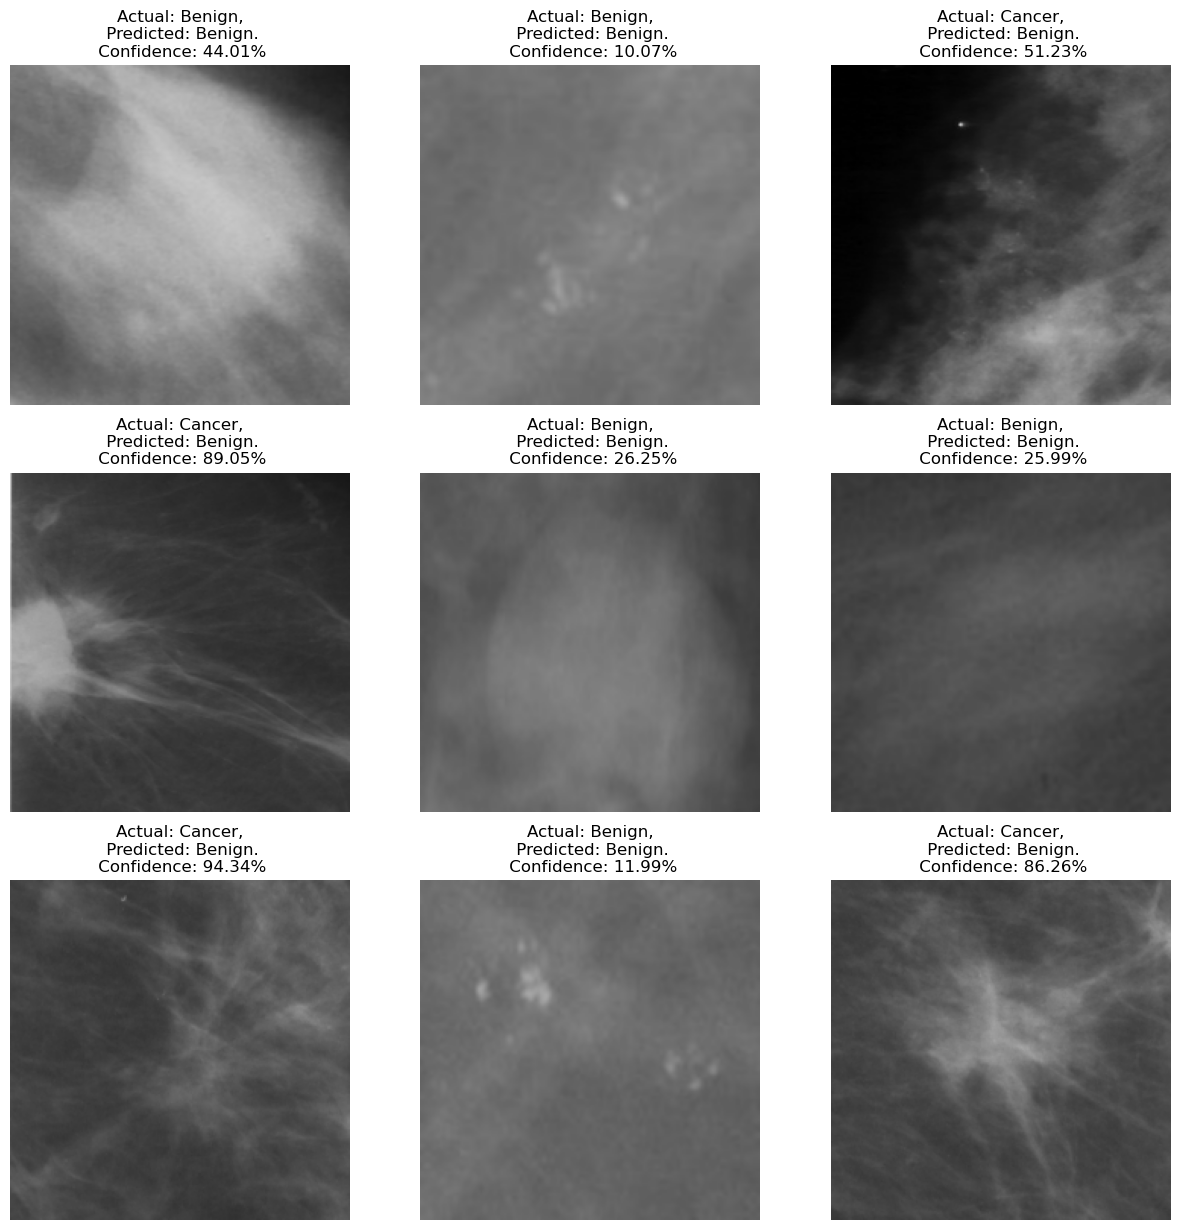

In [ ]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")